In [2]:
import pandas as pd
import numpy as np

from plotnine import *

In [3]:
job = pd.read_csv('job_training_data.csv')
job

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function.,fraudulent
0,13454,Field Operations Specialist,"US, SD, Yankton",NaN,NaN,"Working at FBNAt FBN, we put farmers first. Fo...",Farmers Business Network (“FBN”) is an advance...,"Things we look forHonesty, integrity and a pas...",Competitive compensation based on experienceHe...,0,1,0,Full-time,Director,Bachelor's Degree,Farming,Customer Service,0
1,11411,CM2 5AS Warehousing apprenticeship available u...,"GB, , Chelmsford",NaN,NaN,Established on the principles that full time e...,This is fantastic opportunity for someone want...,Government funding is only available for 16-18...,Future Prospects,0,1,1,NaN,Not Applicable,High School or equivalent,NaN,NaN,0
2,15153,Lead QA Tester,"GB, LND, London",Blippbuilder,35000-40000,"As augmented reality jobs go, one at Blippar i...",We are looking for an experienced Lead QA test...,This role requires somebody who has both a str...,"Our bright, open, centrally located offices ar...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Quality Assurance,0
3,2814,Basingstoke Fragrance/Beauty Staff Needed,"GB, HAM, Basingstoke",NaN,NaN,Established on the principles that full time e...,We are currently recruiting for an exciting Pr...,NaN,NaN,0,1,0,NaN,NaN,NaN,Cosmetics,NaN,0
4,13996,Swim Instructor,"US, NJ, Hawthorne",NaN,NaN,NaN,Looking for a part time swimming instructor to...,Must be Lifeguard and CPR certified,Pay is negotiable,0,0,1,Part-time,NaN,Unspecified,NaN,Other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,17632,Property Preservation Field Crews,"US, MD, Frederick",NaN,NaN,NaN,We are looking for a contractors/individual wh...,**NOTE: You must have the necessary tools for...,As per job,0,0,0,Contract,NaN,NaN,Real Estate,NaN,1
5358,17751,Administrative Assistant,"US, MD, Baltimore",NaN,NaN,NaN,Administrative AssistantEssential Job Responsi...,NaN,NaN,0,0,0,Full-time,Entry level,Unspecified,Hospital & Health Care,Administrative,1
5359,17561,Job for freelancer working in Saudi Arabia,"SA, 01, Murabba Riyadh",IT Administrator / Developer,NaN,NaN,Hundreds of Freelance Jobs available every mon...,Freelancer working in Saudi Arabia.,NaN,0,0,1,Full-time,Entry level,Master's Degree,Computer Networking,Information Technology,1
5360,2397,Senior QA Engineer,"IN, , Hyderabad",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Responsibilities:* Acquire and maintain a comp...,Required Skills and Experience:Minimum of five...,What Is OfferedOur client's core values drive ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,1


In [4]:
job[job['fraudulent'] == 1] # only 259 out of 5362 are fraudu.

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function.,fraudulent
5103,13139,Principal Engineer,"US, TX, Houston",NaN,NaN,Aker Solutions is a global provider of product...,Corporate overviewAker Solutions is a global p...,Qualifications &amp; personal attributes Degre...,We offer• Friendly colleagues in an industry w...,0,1,0,Full-time,NaN,NaN,Oil & Energy,Engineering,1
5104,2978,Administrative Assistant/Customer Service,"US, CA, San diego",Account/finance,60000-80000,NaN,We have Entry Level and Experienced Level posi...,"Skills/Qualifications: Data Entry, Clerical Of...","Benefits: Health, Dental, Life and AD&amp;D In...",0,0,1,Full-time,Entry level,High School or equivalent,Accounting,Accounting/Auditing,1
5105,9757,Property Preservation Field Crews,"US, MD, Rockville",NaN,NaN,NaN,We are looking for a contractors/individual wh...,**NOTE: You must have the necessary tools for...,As per job,0,0,0,Contract,NaN,NaN,Real Estate,NaN,1
5106,17514,Office Manager,"PL, MZ, Warsaw",NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,1
5107,17828,Student Positions Part-Time and Full-Time.,"US, CA, Los Angeles",NaN,NaN,NaN,Student Positions Part-Time and Full-Time.You ...,NaN,NaN,0,0,0,Part-time,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,17632,Property Preservation Field Crews,"US, MD, Frederick",NaN,NaN,NaN,We are looking for a contractors/individual wh...,**NOTE: You must have the necessary tools for...,As per job,0,0,0,Contract,NaN,NaN,Real Estate,NaN,1
5358,17751,Administrative Assistant,"US, MD, Baltimore",NaN,NaN,NaN,Administrative AssistantEssential Job Responsi...,NaN,NaN,0,0,0,Full-time,Entry level,Unspecified,Hospital & Health Care,Administrative,1
5359,17561,Job for freelancer working in Saudi Arabia,"SA, 01, Murabba Riyadh",IT Administrator / Developer,NaN,NaN,Hundreds of Freelance Jobs available every mon...,Freelancer working in Saudi Arabia.,NaN,0,0,1,Full-time,Entry level,Master's Degree,Computer Networking,Information Technology,1
5360,2397,Senior QA Engineer,"IN, , Hyderabad",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Responsibilities:* Acquire and maintain a comp...,Required Skills and Experience:Minimum of five...,What Is OfferedOur client's core values drive ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,1


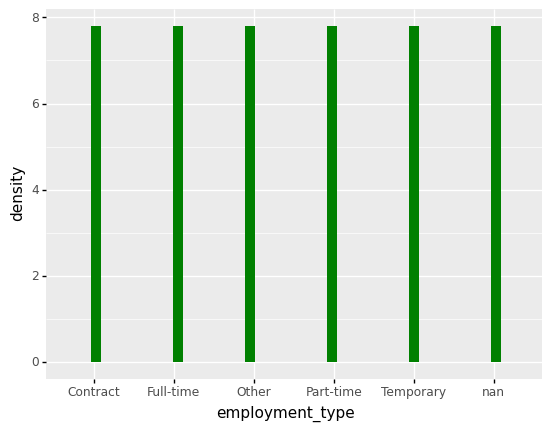

<ggplot: (103362277952)>

In [42]:
(ggplot() + 
    geom_histogram(aes(x='employment_type', y='..density..'), data=job[job.fraudulent==0], fill='green', bins=40) #+ 
    #geom_histogram(aes(x='employment_type', y='..density..'), data=job[job.fraudulent==1], fill='red', bins=15)
)

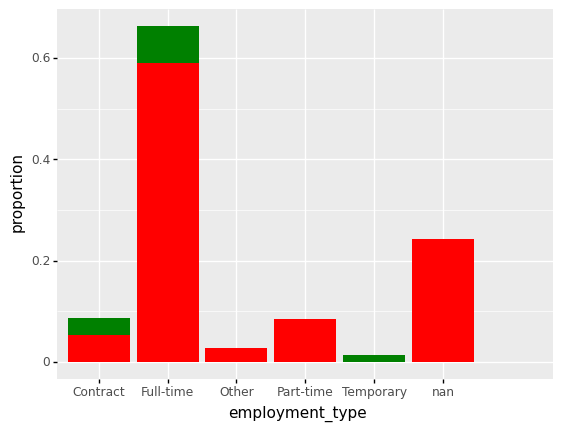

<ggplot: (103360357211)>

In [76]:
# I need to make the two barcharts dodge each other!!!
(ggplot() + 
    geom_bar(aes(x='employment_type', y='..prop..', group=1), data=job[job.fraudulent==0], fill='green') + 
    geom_bar(aes(x='employment_type', y='..prop..', group=1), data=job[job.fraudulent==1], fill='red') + 
    labs(y='proportion')
)

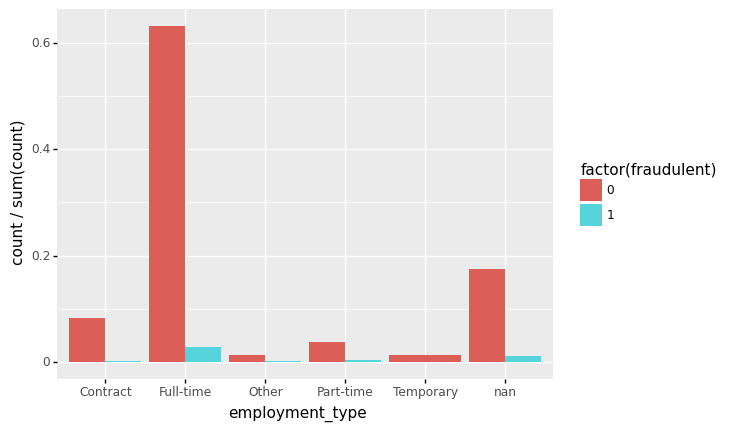

<ggplot: (145405796705)>

In [19]:
(ggplot(job) + 
    geom_bar(aes(x='employment_type', y='..count.. / sum(..count..)', fill='factor(fraudulent)'), position='dodge')
)

In [91]:
df = job.copy()
df['prop'] = pd.Series(data=np.empty(df.shape[0]))
num_fraud = sum(job.fraudulent==1)
#for ind in df.index:
    

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function.,fraudulent,prop
0,13454,Field Operations Specialist,"US, SD, Yankton",NaN,NaN,"Working at FBNAt FBN, we put farmers first. Fo...",Farmers Business Network (“FBN”) is an advance...,"Things we look forHonesty, integrity and a pas...",Competitive compensation based on experienceHe...,0,1,0,Full-time,Director,Bachelor's Degree,Farming,Customer Service,0,8.171687e-312
1,11411,CM2 5AS Warehousing apprenticeship available u...,"GB, , Chelmsford",NaN,NaN,Established on the principles that full time e...,This is fantastic opportunity for someone want...,Government funding is only available for 16-18...,Future Prospects,0,1,1,NaN,Not Applicable,High School or equivalent,NaN,NaN,0,8.171655e-312
2,15153,Lead QA Tester,"GB, LND, London",Blippbuilder,35000-40000,"As augmented reality jobs go, one at Blippar i...",We are looking for an experienced Lead QA test...,This role requires somebody who has both a str...,"Our bright, open, centrally located offices ar...",0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Quality Assurance,0,0.000000e+00
3,2814,Basingstoke Fragrance/Beauty Staff Needed,"GB, HAM, Basingstoke",NaN,NaN,Established on the principles that full time e...,We are currently recruiting for an exciting Pr...,NaN,NaN,0,1,0,NaN,NaN,NaN,Cosmetics,NaN,0,8.171078e-312
4,13996,Swim Instructor,"US, NJ, Hawthorne",NaN,NaN,NaN,Looking for a part time swimming instructor to...,Must be Lifeguard and CPR certified,Pay is negotiable,0,0,1,Part-time,NaN,Unspecified,NaN,Other,0,4.940656e-324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5357,17632,Property Preservation Field Crews,"US, MD, Frederick",NaN,NaN,NaN,We are looking for a contractors/individual wh...,**NOTE: You must have the necessary tools for...,As per job,0,0,0,Contract,NaN,NaN,Real Estate,NaN,1,8.170819e-312
5358,17751,Administrative Assistant,"US, MD, Baltimore",NaN,NaN,NaN,Administrative AssistantEssential Job Responsi...,NaN,NaN,0,0,0,Full-time,Entry level,Unspecified,Hospital & Health Care,Administrative,1,8.170091e-312
5359,17561,Job for freelancer working in Saudi Arabia,"SA, 01, Murabba Riyadh",IT Administrator / Developer,NaN,NaN,Hundreds of Freelance Jobs available every mon...,Freelancer working in Saudi Arabia.,NaN,0,0,1,Full-time,Entry level,Master's Degree,Computer Networking,Information Technology,1,8.170091e-312
5360,2397,Senior QA Engineer,"IN, , Hyderabad",Information Technology,NaN,Aptitude Staffing Solutions has redesigned the...,Responsibilities:* Acquire and maintain a comp...,Required Skills and Experience:Minimum of five...,What Is OfferedOur client's core values drive ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Marketing and Advertising,Engineering,1,8.171670e-312


In [93]:
(ggplot() + 
    geom_bar(aes(x='employment_type', y='..prop..', group=1), data=job[job.fraudulent==0], fill='green') + 
    geom_bar(aes(x='employment_type', y='..prop..', group=1), data=job[job.fraudulent==1], fill='red') + 
    labs(y='proportion')
)

259

In [94]:
job.fraudulent==1

0       False
1       False
2       False
3       False
4       False
        ...  
5357     True
5358     True
5359     True
5360     True
5361     True
Name: fraudulent, Length: 5362, dtype: bool